In [1]:
from math import sqrt
import numpy as np
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import matthews_corrcoef
from scipy.stats import spearmanr

In [2]:
def fun(s):
  new_data = read_csv('/content/drive/MyDrive/inno/data.csv', header=0, index_col=0)
  n = int((len(new_data))*(0.8))
  
  train = new_data[:n]
  valid = new_data[n:]
  x_train = train.drop(s, axis=1)
  y_train = train[s]
  x_valid = valid.drop(s, axis=1)
  y_valid = valid[s]

  scaler = MinMaxScaler(feature_range=(0, 1))

  x_train_scaled = scaler.fit_transform(x_train)
  x_train = pd.DataFrame(x_train_scaled)
  x_valid_scaled = scaler.fit_transform(x_valid)
  x_valid = pd.DataFrame(x_valid_scaled)

  #using gridsearch to find the best parameter
  params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
  knn = neighbors.KNeighborsRegressor()
  model = GridSearchCV(knn, params, cv=5)

  #fit the model and make predictions
  model.fit(x_train,y_train)
  preds = model.predict(x_valid)

  y_valid = valid.assign(Predictions = preds)
  gr = y_valid[[s, 'Predictions']]
  gr.plot()
  pyplot.show()

  rmse = np.sqrt(np.mean(np.power((np.array(y_valid[s])-np.array(preds)),2)))
  print('Test RMSE(Root Mean Squared Error)  : %.3f' % rmse)
  cc = spearmanr(preds, y_valid[s])
  print('Test CC(Corelation Coefficient)     : %.3f' % cc.correlation)
  inv_yhat = preds
  inv_y = y_valid[s]
  xpb, xob, num, den = 0, 0, 0, 0
  for y in inv_yhat:
    xpb += y
  xpb = xpb/len(inv_yhat)
  for y in inv_y:
    xob += y
    num += y - xpb
    den += y
  xob = xob/len(inv_y)
  pb = num/den
  print('Test PB(Percentage Bias)            : %.3f' % pb)
  num, den = 0, 0
  for i in range(0, len(inv_y)):
    num += ((inv_y[i] - inv_yhat[i])*(inv_y[i] - inv_yhat[i]))
    den += ((inv_y[i] - xob)*(inv_y[i] - xob))
  nse = abs(1 - (num/den))
  print('Test NSE(Nash Sutcliffe Efficiency) : %.3f' % nse)

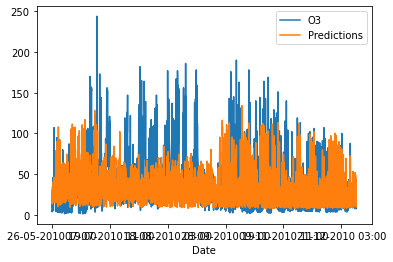

Test RMSE(Root Mean Squared Error)  : 33.769
Test CC(Corelation Coefficient)     : 0.502
Test PB(Percentage Bias)            : 0.150
Test NSE(Nash Sutcliffe Efficiency) : 0.081


In [3]:
fun('O3')

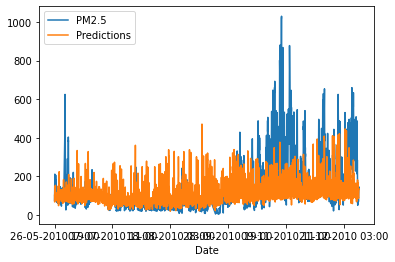

Test RMSE(Root Mean Squared Error)  : 126.908
Test CC(Corelation Coefficient)     : 0.537
Test PB(Percentage Bias)            : 0.194
Test NSE(Nash Sutcliffe Efficiency) : 0.184


In [4]:
fun('PM2.5')

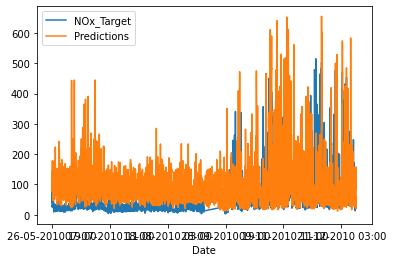

Test RMSE(Root Mean Squared Error)  : 81.243
Test CC(Corelation Coefficient)     : 0.336
Test PB(Percentage Bias)            : -0.567
Test NSE(Nash Sutcliffe Efficiency) : 0.011


In [5]:
fun('NOx_Target')

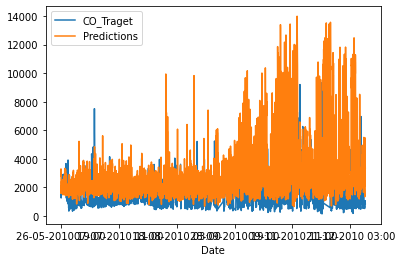

Test RMSE(Root Mean Squared Error)  : 2277.492
Test CC(Corelation Coefficient)     : 0.380
Test PB(Percentage Bias)            : -0.846
Test NSE(Nash Sutcliffe Efficiency) : 2.192


In [6]:
fun('CO_Traget')